In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
CLEAN_TWEETS = False

# Importing library and checking GPU

In [ ]:
import numpy as np
import pandas as pd
import os, re

import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
# Get the GPU device name.
# Setting up the device for GPU usage
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# Import the torch module to access its functions
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

Looking in indexes: https://download.pytorch.org/whl/cu118
cuda


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

Installing Hugging face lib, but look like they already interaged in

In [ ]:
df = pd.read_csv('labeled_data.csv')

print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 24,783



,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
17588,17987,6,0,6,0,1,RT @TeeeeRenee: bitches b tweeting everything ...
21098,21551,3,0,3,0,1,Son why is our mail lady so ghetto &#128529;
24190,24694,3,0,3,0,1,"look at this bitch, walking too close to my fu..."
4484,4616,3,0,3,0,1,"@RainaluvsA intimidated?! What pussies, all I ..."
15353,15716,3,0,3,0,1,RT @Gmel_Genuine: When ya broke ONLY real bitc...
11197,11484,3,0,3,0,1,I'm XXX triple x rated bitch
19070,19495,3,1,2,0,1,RT @gucci10I7: side hoes shall only eat side d...
4364,4492,3,0,2,1,1,@OsvaldoVause text me u nigglet
6718,6906,3,0,0,3,2,@moneypulatief @globalriot Nee dat is na langd...
12567,12879,3,0,3,0,1,Lmfaooooooooo bro RT @BrandNewAndrew: Stripper...


In the [class] collum: <br>
0 prefer to hate speech <br>
1 is offensive <br>
2 is neither

# Preprocessing

In [ ]:
#strip tweet related character
def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
#check functionality
print(df['tweet'][1])
strip_all_entities(df['tweet'][1])

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!


'RT boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place'

In [ ]:
if CLEAN_TWEETS == False:
    df['tweet']=df['tweet'].apply(strip_all_entities)

In [ ]:
sentences = df['tweet'].values
labels = df['class'].values

# Train Test Val split

In [ ]:
from sklearn.model_selection import train_test_split

train, Teal = train_test_split(df, random_state=1508, shuffle=True, test_size=0.2)

In [ ]:
test, validation = train_test_split(Teal, random_state=1508, shuffle=True, test_size=0.5)

In [ ]:
# Get the lists of sentences and their labels.
trn_sentences = train['tweet'].values
train_labels = train['class'].values

tst_sentences = test['tweet'].values
test_labels = test['class'].values

val_sentences = validation['tweet'].values
validation_labels = validation['class'].values

## tokenization

In [ ]:
from transformers import BertTokenizer

print('loading Bert tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

loading Bert tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
enc_exp = tokenizer.encode('My name is Quan')
dec_exp = tokenizer.decode(enc_exp)
print(enc_exp)
print(dec_exp)

[101, 2026, 2171, 2003, 24110, 102]
[CLS] my name is quan [SEP]


## padding & masking

In [ ]:
print('Max array length: ', max([len(i) for i in sentences]))

Max array length:  581


In [ ]:
count1, count2, count3 = 0, 0, 0
for i in sentences:
    if len(i)>100:
        count1+=1
    if len(i)>200:
        count2+=1
    if len(i)>300:
        count3+=1
print('number of array longer than 100: ', count1)
print('number of array longer than 200: ', count2)
print('number of array longer than 300: ', count3)

number of array longer than 100:  5713
number of array longer than 200:  23
number of array longer than 300:  7


In [ ]:
# from statistics import mean

# token_len = []
# for i in sentences:
#     if len(i)>100 and len(i)<200:
#         enc = tokenizer.encode(i)
#         token_len.append(len(enc))
# print('average token length: ', mean(token_len))
# print('maximum token length: ', max(token_len))

--output-- <br>
average token length:  31.558446124099138 <br>
maximum token length:  83

In [ ]:
# count = 0
# for i in token_len:
#     if i > 64:
#         count+=1
# print('number of sentence longer than 64 words:', count)

--output-- <br>
number of sentence longer than 64 words: 14

In [ ]:
def bert_encode(data, max_len) :
    input_ids = []
    attention_masks = []


    for i in range(len(data)):
        encoded = tokenizer.encode_plus(data[i],
                                        add_special_tokens=True,
                                        max_length = max_len,
                                        padding = 'max_length',
                                        truncation = True,
                                        return_attention_mask=True)

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids),np.array(attention_masks)

In [ ]:
print(len(sentences),len(trn_sentences),len(tst_sentences),len(val_sentences))

24783 19826 2478 2479


In [ ]:
MAX_LEN = 64
train_inputs, train_masks = bert_encode(trn_sentences,MAX_LEN)

#test_inputs, test_masks = bert_encode(tst_sentences,MAX_LEN)

validation_inputs, validation_masks = bert_encode(val_sentences,MAX_LEN)

## convert data to pytorch datatype

In [ ]:
!pip install torch # Install the 'torch' module if not already installed.
import torch # Import the 'torch' module into the current session.

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

BERT + LSTM

In [ ]:
import torch
from transformers import BertModel, BertConfig
from torch import nn
from torch.cuda.amp import autocast, GradScaler
from transformers import get_linear_schedule_with_warmup
import numpy as np

# Define flat_accuracy function
def flat_accuracy(preds, labels):
    # Convert logits to predicted class indices (the class with the highest probability)
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Define a custom model combining BERT and LSTM
class BertLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased", num_labels=3, hidden_dim=256):
        super(BertLSTMClassifier, self).__init__()
        # Load pretrained BERT
        self.bert = BertModel.from_pretrained(bert_model_name)
        # LSTM layer
        self.lstm = nn.LSTM(input_size=self.bert.config.hidden_size, hidden_size=hidden_dim, batch_first=True)
        # Fully connected layer for classification
        self.classifier = nn.Linear(hidden_dim, num_labels)

    def forward(self, input_ids, attention_mask):
        # Extract embeddings from BERT
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = bert_output.last_hidden_state  # Shape: [batch_size, seq_length, hidden_size]

        # Pass BERT embeddings to LSTM
        lstm_output, (h_n, c_n) = self.lstm(last_hidden_state)
        # Use the output of the LSTM for the classification layer (using last time step)
        logits = self.classifier(h_n[-1])  # Shape: [batch_size, num_labels]

        return logits

# Initialize model, optimizer, scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertLSTMClassifier().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Set up scheduler
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Set up gradient scaler for AMP
scaler = GradScaler()

# Training loop with AMP
for epoch_i in range(epochs):
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        # Use autocast for mixed precision
        with autocast():
            # Forward pass
            logits = model(b_input_ids, attention_mask=b_input_mask)

            # Compute loss
            loss = nn.CrossEntropyLoss()(logits, b_labels)

        total_loss += loss.item()

        # Backward pass using scaled gradients
        scaler.scale(loss).backward()

        # Gradient clipping and optimizer step with scaler
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        scaler.step(optimizer)
        scaler.update()

        # Step the scheduler
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch_i+1}/{epochs}, Loss: {avg_train_loss:.2f}")

# Validation loop
model.eval()
eval_accuracy = 0

for batch in validation_dataloader:
    b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        logits = model(b_input_ids, attention_mask=b_input_mask)

    # Calculate accuracy
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    eval_accuracy += flat_accuracy(logits, label_ids)

print("Validation Accuracy:", eval_accuracy / len(validation_dataloader))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<ipython-input-26-098071aa09df>:49: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-26-098071aa09df>:64: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/4, Loss: 0.44
Epoch 2/4, Loss: 0.26
Epoch 3/4, Loss: 0.24


PLOTTING


<ipython-input-27-8e380f09cf53>:38: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-27-8e380f09cf53>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/4, Loss: 0.45, Accuracy: 0.84
Validation Accuracy: 0.8937767094017095
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.90      0.98      0.94      1902
           2       0.87      0.80      0.83       435

    accuracy                           0.89      2479
   macro avg       0.75      0.60      0.59      2479
weighted avg       0.87      0.89      0.87      2479



<ipython-input-27-8e380f09cf53>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2/4, Loss: 0.26, Accuracy: 0.91
Validation Accuracy: 0.9146100427350428
              precision    recall  f1-score   support

           0       0.60      0.13      0.21       142
           1       0.94      0.96      0.95      1902
           2       0.83      0.96      0.89       435

    accuracy                           0.91      2479
   macro avg       0.79      0.68      0.68      2479
weighted avg       0.90      0.91      0.90      2479



<ipython-input-27-8e380f09cf53>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3/4, Loss: 0.23, Accuracy: 0.92
Validation Accuracy: 0.9149572649572649
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       142
           1       0.95      0.95      0.95      1902
           2       0.88      0.94      0.91       435

    accuracy                           0.92      2479
   macro avg       0.77      0.77      0.77      2479
weighted avg       0.91      0.92      0.91      2479



<ipython-input-27-8e380f09cf53>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4/4, Loss: 0.21, Accuracy: 0.93
Validation Accuracy: 0.9149572649572649
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       142
           1       0.94      0.96      0.95      1902
           2       0.89      0.90      0.90       435

    accuracy                           0.92      2479
   macro avg       0.78      0.76      0.77      2479
weighted avg       0.91      0.92      0.91      2479



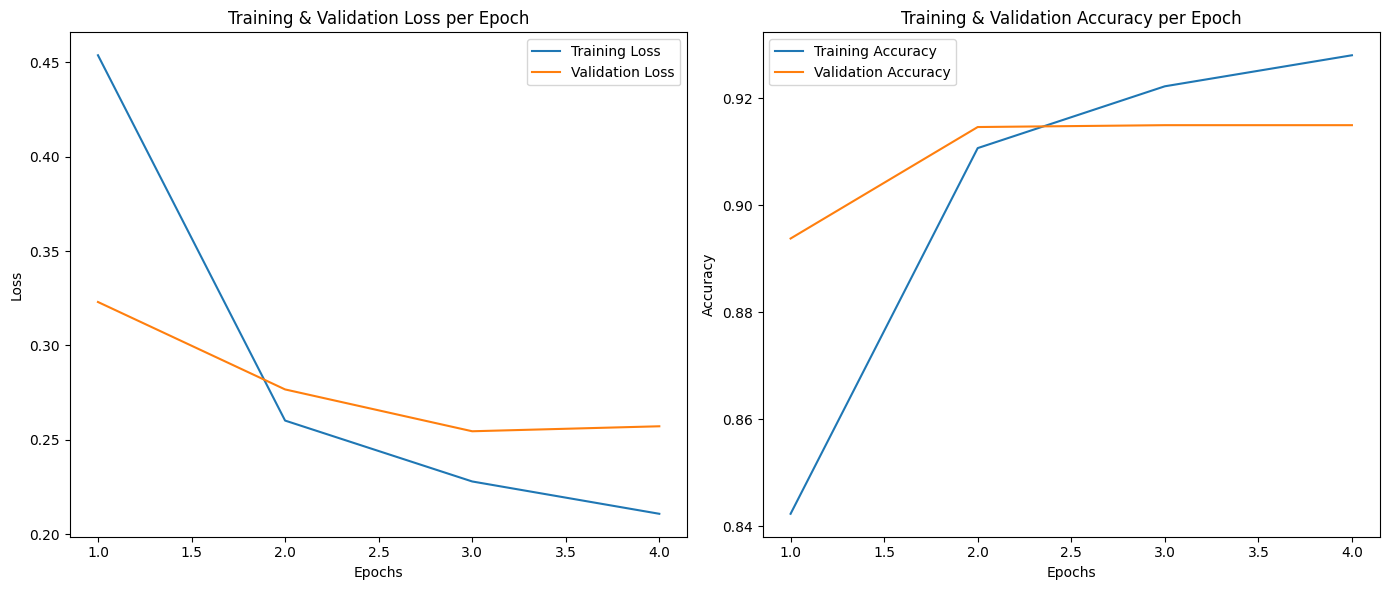

In [ ]:
import torch
from transformers import BertModel, BertConfig
from torch import nn
from torch.cuda.amp import autocast, GradScaler
from transformers import get_linear_schedule_with_warmup
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define flat_accuracy function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Define a custom model combining BERT and LSTM
class BertLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased", num_labels=3, hidden_dim=256):
        super(BertLSTMClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.lstm = nn.LSTM(input_size=self.bert.config.hidden_size, hidden_size=hidden_dim, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, num_labels)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = bert_output.last_hidden_state
        lstm_output, (h_n, c_n) = self.lstm(last_hidden_state)
        logits = self.classifier(h_n[-1])
        return logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertLSTMClassifier().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)

epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
scaler = GradScaler()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with AMP
for epoch_i in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        with autocast():
            logits = model(b_input_ids, attention_mask=b_input_mask)
            loss = nn.CrossEntropyLoss()(logits, b_labels)

        total_loss += loss.item()

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        correct_predictions += np.sum(np.argmax(logits, axis=1) == label_ids)
        total_predictions += len(label_ids)

    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = correct_predictions / total_predictions
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    print(f"Epoch {epoch_i+1}/{epochs}, Loss: {avg_train_loss:.2f}, Accuracy: {avg_train_accuracy:.2f}")

    # Validation loop
    model.eval()
    eval_accuracy = 0
    eval_loss = 0
    all_preds = []
    all_labels = []

    for batch in validation_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            logits = model(b_input_ids, attention_mask=b_input_mask)
            loss = nn.CrossEntropyLoss()(logits, b_labels)
            eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        eval_accuracy += flat_accuracy(logits, label_ids)

        all_preds.extend(np.argmax(logits, axis=1))
        all_labels.extend(label_ids)

    avg_val_accuracy = eval_accuracy / len(validation_dataloader)
    avg_val_loss = eval_loss / len(validation_dataloader)
    val_accuracies.append(avg_val_accuracy)
    val_losses.append(avg_val_loss)

    print("Validation Accuracy:", avg_val_accuracy)
    print(classification_report(all_labels, all_preds))

# Plot training and validation loss and accuracy
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss per Epoch")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, epochs + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy per Epoch")
plt.legend()

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

 Hate Speech       0.51      0.42      0.46       142
   Offensive       0.94      0.96      0.95      1902
     Neutral       0.89      0.90      0.90       435

    accuracy                           0.92      2479
   macro avg       0.78      0.76      0.77      2479
weighted avg       0.91      0.92      0.91      2479

Confusion Matrix:


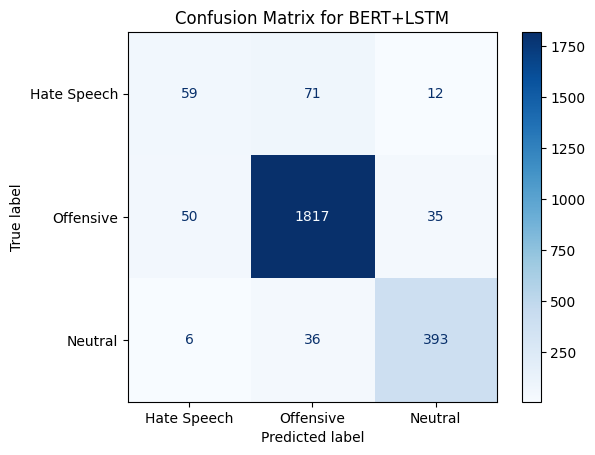

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate predictions and true labels for validation data
model.eval()
all_preds = []
all_labels = []

for batch in validation_dataloader:
    b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        logits = model(b_input_ids, attention_mask=b_input_mask)

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    all_preds.extend(np.argmax(logits, axis=1))
    all_labels.extend(label_ids)

# Generate classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Hate Speech", "Offensive", "Neutral"]))

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hate Speech", "Offensive", "Neutral"])

# Visualize the confusion matrix
print("Confusion Matrix:")
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for BERT+LSTM")
plt.show()
